# Day 9: Introduction to Machine Learning with Real-World Data

Welcome to Day 9! Today, we embark on a comprehensive journey into the world of machine learning (ML). This notebook is designed to serve as a standalone resource, blending theory, hands-on coding, and real-world datasets from the World Bank DataBank.

## Learning Objectives
- Understand the core concepts and types of machine learning
- Explore the machine learning workflow
- Work with real-world datasets (World Bank DataBank)
- Build, evaluate, and interpret basic ML models using scikit-learn and other libraries
- Practice with quizzes, open-ended questions, and hands-on exercises

## Table of Contents
1. [What is Machine Learning?](#ml-basics)
2. [Types of Machine Learning](#ml-types)
3. [The Machine Learning Workflow](#ml-workflow)
4. [Getting Real-World Data: World Bank DataBank](#data-acquisition)
5. [Data Preprocessing](#preprocessing)
6. [Building Your First ML Model](#first-model)
7. [Model Evaluation](#evaluation)
8. [Hands-On Exercises](#exercises)
9. [Quizzes & Open-Ended Questions](#quizzes)
10. [Further Reading & Resources](#resources)

## 1. What is Machine Learning? <a id='ml-basics'></a>

Machine Learning (ML) is a subset of artificial intelligence (AI) that enables computers to learn from data and make predictions or decisions without being explicitly programmed. ML algorithms identify patterns in data and use these patterns to make predictions on new, unseen data.

**Key Concepts:**
- **Features:** Input variables used for prediction (e.g., age, income)
- **Target/Label:** The output variable to predict (e.g., disease status)
- **Training Data:** Data used to train the model
- **Test Data:** Data used to evaluate the model's performance

## 2. Types of Machine Learning <a id='ml-types'></a>

- **Supervised Learning:** Learn from labeled data (e.g., classification, regression)
- **Unsupervised Learning:** Find patterns in unlabeled data (e.g., clustering, dimensionality reduction)
- **Reinforcement Learning:** Learn by interacting with an environment and receiving feedback (rewards/penalties)

**Quiz:**
- What is the difference between supervised and unsupervised learning?
- Give an example of a real-world problem for each type.

## 3. The Machine Learning Workflow <a id='ml-workflow'></a>

1. Define the problem
2. Acquire and explore data
3. Preprocess and clean data
4. Select and train a model
5. Evaluate the model
6. Interpret and communicate results
7. Deploy the model (optional)

## 4. Data Preparation
We are going to use the TfL "bikes" data set to predict the count of people hiring bikes on a day. Although the count data is integer, we are going to assume it can be represented by a continuous floating point number. Before we get started training regression models, we are going to briefly prepare our data by filling in missing values and scaling a few selected columns.

In [1]:
# Import required libraries
import pandas as pd 
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set up matplotlib for inline plotting
%matplotlib inline

In [3]:
# Import data
bikes_filepath = '../data/bikes.csv'
bikes_imported_data = pd.read_csv(filepath_or_buffer=bikes_filepath, delimiter=",")

# Clean missing data
bikes_clean_data = bikes_imported_data.interpolate(method='linear')
bikes_clean_data = bikes_clean_data.fillna(method="bfill")

# Set our target variable as the count
y = bikes_clean_data["count"].to_numpy()

# Create scaler object
rb_scaler = RobustScaler()

# We are just going to use numerical data to begin with
# Drop our count and multicolinear feel_temperature
numerical_data = bikes_clean_data.select_dtypes(include='number')
numerical_data = numerical_data.drop(columns=["count", "feel_temperature"])

# Scale the data.
scaled_features = rb_scaler.fit_transform(numerical_data)
scaled_data = pd.DataFrame(scaled_features, columns=numerical_data.columns)

scaled_data.head()

,real_temperature,humidity,wind_speed
0,-1.338983,1.241935,-0.881437
1,-0.491525,0.500000,-0.725749
2,-0.627119,0.387097,0.095808
3,-0.491525,0.467742,0.528196
4,-0.491525,0.370968,0.610778


---
# Model Training
We are first going to train a simple linear model that uses one variable to predict another, a univariable model. This will be in the form: $$ f(x) = a_1 x + a_0 $$ Where $a_1$ is the gradient and $a_0$ is the intercept. For a univariable model $x$ is one variable and is therefore a vector.

A univariable regression model has one target variable that we are trying to predict, and one feature variable we are using to make that prediction. If $n$ is the number of features used to predict the target variable then this model has $n = 1$.

A multivariable regression model has one target variable to be predicted and multiple feature variables. Using the same formulatiuon as above for a multivariable model $n > 1$. We will often be using this type of model to make predictions as multiple variables often give us more information about patterns producing a better prediction.

We are going to use the Ordinary Least Squares method of regression in this first example. For an interactive guide through how this method works you can look [here](http://setosa.io/ev/ordinary-least-squares-regression/), and for a deeper dive into the maths behind the method you can look [here](https://people.revoledu.com/kardi/tutorial/Regression/OLS.html).

Lets first use the **`humidity`** attribute to predict the value of the **`count`** of bikes hired. We train a model by creating the model object, then calling the **`fit(X, y)`** method. 

We need our data to be in the $X$, $y$ format in order for our model to use it. The $R^2$ measure is a commonly used metric to see how well a regression performs. More formally, the "coefficient of determination" quantifies the proportion of variance that our training data predicts in the target data. 

The coefficient is defined generally as $$ R^2 = \frac{explained~variation}{total~variation}$$ We therefore have a maximum possible value for $R^2$ of 1, which corresponds to the model being able to predict all the variation in the data. Bad models will produce a value of $R^2 \sim 0$ and very bad models will be $R^2 < 0$


A more in depth explaination of this metric can be found [here.](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In order to evaluate our model we are going to need to split our data into training and test sets just like we did at the end of Chapter 1 - Data Preparation. 

## 5. Notes on data shape (dimensions for scikit-learn libraries)
Some of you have had issues with the shape of the data fed into the regressor models from scikit-learn. This section of the notes examine the shape of the data passed into the learning libraries and how that shape might cause errors if not addressed prior to fitting the data to the model.

It is important that we remember the shapes of our data structures when working with models. Before we pass our data into the model let's check what it looks like.

In [4]:
# Selecting only the humidity attribute for this example.
X_humidity = scaled_data["humidity"].to_numpy()
print("X_humidity shape: ", X_humidity.shape)
print(X_humidity[:10])

X_humidity shape:  (730,)
[ 1.24193548  0.5         0.38709677  0.46774194  0.37096774  0.12903226
 -0.4516129  -0.30645161  0.17741935  0.06451613]


For our feature data we need a 2D matrix, however it currently a vector not a matrix. If we use **numpy** to reshape the vector we can make it into a 2D matrix. We use the `.reshape(-1, 1)` command.

In [5]:
X_humidity = X_humidity.reshape(-1, 1)
print("X_humidity new shape: ", X_humidity.shape)
print(X_humidity[:10])

X_humidity new shape:  (730, 1)
[[ 1.24193548]
 [ 0.5       ]
 [ 0.38709677]
 [ 0.46774194]
 [ 0.37096774]
 [ 0.12903226]
 [-0.4516129 ]
 [-0.30645161]
 [ 0.17741935]
 [ 0.06451613]]


## 6. Building Your First ML Model <a id='first-model'></a>

Let's build a simple regression model to predict the number of bikes rented per day using a single predictor (a single independent variable such as humidity).

In [6]:

# Set our training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_humidity, y, test_size=0.2, random_state=123)

# Create model object
linear_model_univariate = LinearRegression()

# Fit model
linear_model_univariate.fit(X_train, y_train);

In [7]:
# Predict values using our model
y_pred_humidity = linear_model_univariate.predict(X_test)

# Show the first 10 predictions
print(y_pred_humidity[:10])

[28215.4278399  21014.7311773  33200.5255294  31317.26640226
 20571.61138268 26553.72861007 20571.61138268 34973.00470788
 30652.58671032 28880.10753184]


Our regression model produces coefficients, and these can be shown easily. It is important to remember we have produced this model on scaled data, the coefficients produced will indicate some informative results, however, they cannot be used directly with the original pre-scaled data. 

Instead of fitting then predicting the values separately, you can do both simultaneously using the **`fit_predict`** method. This is called on the created model and produces the prediction. 

In [8]:
# Showing coefficients learnt from the model.
print("Humidity model coefficient: \n", linear_model_univariate.coef_[0].round(2))
print("Humidity model intercept: \n", linear_model_univariate.intercept_.round(2))

# Calculate R^2 value using the true and predicted values of y test.
r2_value = r2_score(y_test, y_pred_humidity)

print("Humidity R^2 value: \n", r2_value)

Humidity model coefficient: 
 -6868.36
Humidity model intercept: 
 26886.07
Humidity R^2 value: 
 0.3524887458641741


The value of the model coefficient corresponds to $a_1$ and the intercept coefficient to $a_0$.

From our $R^2$ value above we can see that our simple model explains some of the variance in **`count`**, however, most of it is unexplained, there is a lot of room for improvement in this model!

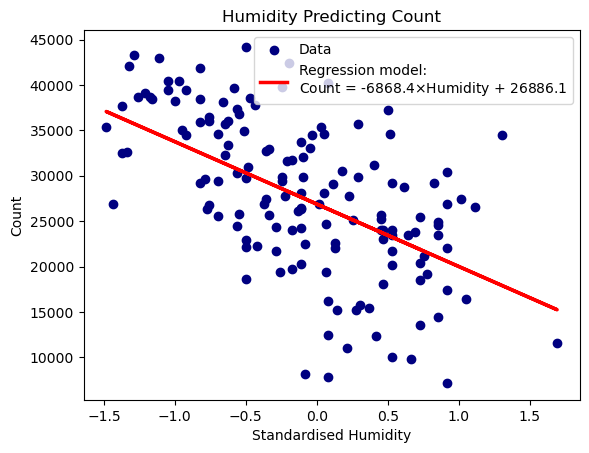

In [9]:
# Plot the scaled data against the daily count.
plt.scatter(X_test, y_test, color="navy", label="Data")
plt.plot(X_test, y_pred_humidity, color='red', linewidth=2.5, 
         label="Regression model:\nCount = {:.1f}{}Humidity + {:.1f}"\
                 .format(linear_model_univariate.coef_[0], r"$\times$", 
                     linear_model_univariate.intercept_))
plt.title("Humidity Predicting Count")
plt.xlabel("Standardised Humidity")
plt.ylabel("Count")
plt.legend();

---
# Multivariable Models

Our model above is able to predict the count to some extent. Our graph shows it captures the trend, but our target is more complicated than being only a result of the days humidity. We shall take into account some other factors, the **`real_temperature`** and **`wind_speed`**. We could also put into the model some of our categorical features that we have encoded from the previous chapter. 

The form that the model will take is $$f(X) = a_3 X_3 + a_2 X_2 + a_1 X_1 + a_0$$ You can see from this each $a_{1-3}$ corresponds to a gradient for each of the different variables given to the model with $a_0$ as the intercept again. For each new feature we put into our model we will get another $a_i$ coefficient associated.

From a model building and programming perspective, multi-variable models are very similar to univariate, we use the same functions, only the data we input into the model changes. In addition, as we increase the number of variables involved in our model, the harder our results will be to visualise. 

> Let's use the three attributes to predict the bike hire count, do we think this will increase or decrease our $R^2$ score?

In [10]:
# Using all of the columns from the scaled data.
X = scaled_data.to_numpy()

# Split the training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Create model object
linear_model_multi_variable = LinearRegression()

# Fit model
linear_model_multi_variable.fit(X_train, y_train);

In [11]:
# Generate predictions from data.
y_pred = linear_model_multi_variable.predict(X_test)

# Show the first 10 predictions
print(y_pred[:10])

[20510.07297652 18573.7092432  28808.91450536 36684.98133118
 30747.48351823 46859.99901362 22608.04847235 26906.77514563
 30090.78855451 27171.64144304]


In [12]:
# Calculate R^2 value using the true and predicted values of y_test.
r2_value = r2_score(y_test, y_pred)

print("Multivariable R^2 value: \n", r2_value)

Multivariable R^2 value: 
 0.592329120362304


## 7. Model Evaluation <a id='evaluation'></a>

---
We have thus far seen one way of measuring how our regression model has performed, the $R^2$ value. This is however, only one of many different methods. We will explore some that use the error $\epsilon$ between **predicted** and **true** values explicitly. 

We also want to consider whether our method of evaluating the performance of a model is consistent, or will it be easily changed when we use slightly different data?

## Regression Error

As alluded to previously, there are other ways to measure the performance of a regression model based on the error between the **true** and **predicted** values.

### Error and Residuals

When we make a prediction and have a true value to compare to we can calculate the error created. This is $\epsilon = y_i - \hat{y_i}$. This term is often referred to as the residual value. If we investigate the residuals we can understand more about the model's performance.

We can analyse our residuals in a similar way to other values, looking at it's distribution and averages tells us about how the model predicts. Remember, an error value of $0$ is desirable. 

If our model has an average value that is not near zero, our model is systemically biased, and not performing well. If we have a skewed distribution then our model may be consistently over or under predicting (different from over/under fitting!). 

We cannot tell from this alone what features are causing this error distribution, but it is a good starting point. We could further investigate the errors by breaking down the data by categories or ranges of values.

For ease of comparison, we often standardize the residual by dividing the residuals by the standard deviation $$standardized\ residual = \frac{\epsilon}{\sigma}$$


A good model which does not have substantial bias should have a residual plot shaped like a normal distribution.




## Cross Validation

What we saw in Exercise 1 is that our evaluation of our regression performance is influenced heavily by the data we put into it, this is a problem especially when we have smaller data sets. This is a result of the model variance discussed in the previous chapter. Taking only one split of the data means our whole model is dependent on that one split. If it randomly chooses to have all the training data with high **`count`** values then that will make our predictions higher than they should be.

Cross validation allows us to use our data to create a range of different data sets, we can then use these different data sets together to get a more general understanding of our model. This method is often called K-fold cross validation. 

The training data is divided into $K$ equally sized partitions ("folds"). From this collection of partitions, we remove one partition to be the test set, and the other $K-1$ folds are the training set. The model is then trained on the $K-1$ set and evaluated on the $K^{th}$ set. This is then repeated with each of the $K$ partitions being the one removed. There are therefore $K$ different models that are trained and tested on different subsets of the data. We can then get a score or metric measurement of our models performance for each.

In [17]:
from sklearn.model_selection import cross_val_score

# Set the chosen K
K = 5

# Create model object
linear_model = LinearRegression()

# General cross-validation scores using the model pre-split data.
cv_scores = cross_val_score(estimator=linear_model, X=X, y=y, cv=K, scoring="r2")

print(cv_scores)

[ 0.60483177  0.39950949 -0.05671052  0.62933359  0.57353494]


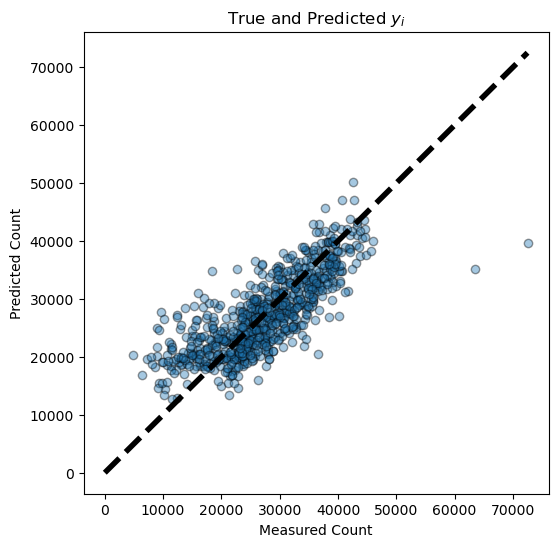

In [18]:
from sklearn.model_selection import cross_val_predict

# Predict the test values using cross validation.
y_pred = cross_val_predict(estimator=linear_model, X=X, y=y, cv=K)

# We can then compare our predicted and true values using a plot.
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y, y_pred, edgecolors=(0, 0, 0), alpha=0.4)
ax.plot([0, y.max()], [0, y.max()], 'k--', lw=4)
ax.set_xlabel('Measured Count')
ax.set_ylabel('Predicted Count')
ax.set_title(r"True and Predicted $y_i$")
plt.show()

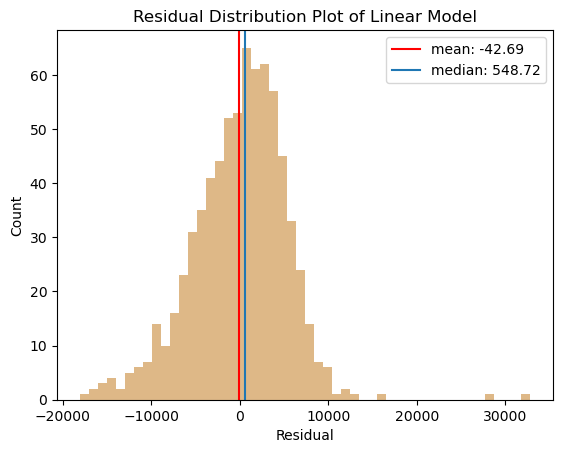

In [19]:
# calculate the residuals
residual = y - y_pred

res_mean = residual.mean()
res_median = np.median(residual)

plt.title("Residual Distribution Plot of Linear Model")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.axvline(x=res_mean, label=f"mean: {res_mean.round(2)}", color="red")
plt.axvline(x=res_median, label=f"median: {res_median.round(2)}", )
plt.hist(residual, bins=50, color="burlywood")
plt.legend();

The above tells us that our data is somewhat skewed, there are some outliers with high residual values. However, we cannot make too many conclusions about the central tendency of the distribution.

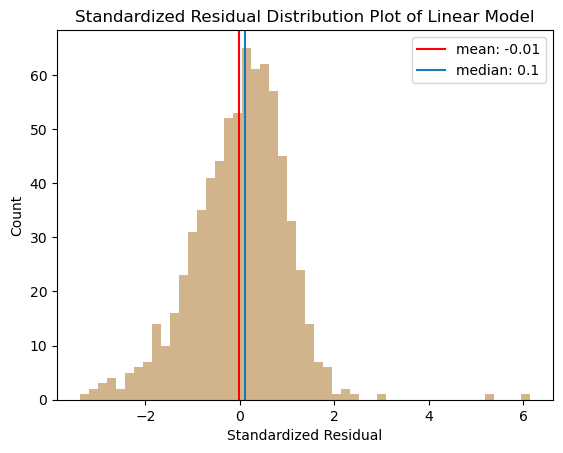

In [20]:
# calculate standardized residual
standard_residual = residual / residual.std()

stan_res_mean = standard_residual.mean()
stan_res_median = np.median(standard_residual)

plt.title("Standardized Residual Distribution Plot of Linear Model")
plt.xlabel("Standardized Residual")
plt.ylabel("Count")
plt.axvline(x=stan_res_mean, label=f"mean: {stan_res_mean.round(2)}", color="red")
plt.axvline(x=stan_res_median, label=f"median: {stan_res_median.round(2)}", )
plt.hist(standard_residual, bins=50, color="tan")
plt.legend();

This shows an identical distribution to previously, however, now as the values are standardized we can look at the values with more confidence, more easily determining outliers. We could perform a z-test, or other hypothesis testing to determine whether the distribution is normal.

Note that the mean is reall quite near zero. However, the median is to the right of zero slightly, implying a right skew. Interesting visually the data appears to have more of a left tail, but with a larger mass to the right. How we weight these different error distributions will determine how we evaluate the model.

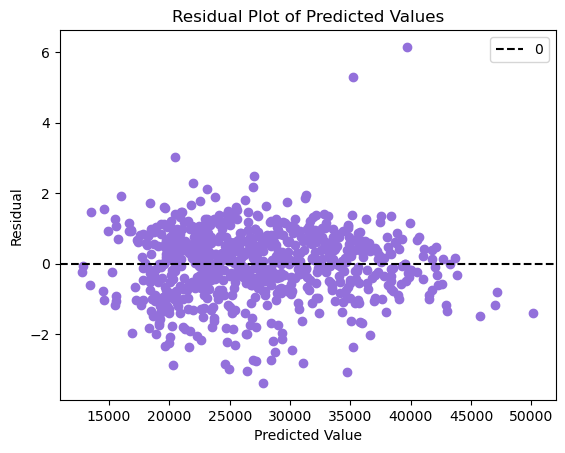

In [21]:
# Another approach to understanding the residual is 
# plotting it against the predicted value
# linking the predicted value and error can help us
# inspect our model's performance
plt.title("Residual Plot of Predicted Values")
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.axhline(0, label="0", color="black", linestyle="--")
plt.scatter(y_pred, standard_residual, color="mediumpurple")
plt.legend();

### Mean Absolute Error

If we take the error as $\epsilon = y_i - \hat{y_i}$ then it makes intuative sense that we want to have a small average error. However, as this is defined as $y_i - \hat{y_i}$ using $\epsilon$ alone would mean we could have values above and below $y_i$. When we take the mean, the average could become zero. One method for handling this issue is to take the absolute value of the error, which means we equally take into account the values that are predicted higher and lower than the **true** value.

This is shown below:

$$MAE = \frac{\sum_{i=1}^{n}| y_i - \hat{y_i} |}{n}$$

And we can implement this metric either explicitly using predictions as in the "Model Training" section, or by using the cross validation **`scoring=`**  argument with **`neg_mean_absolute_error`**. 

Below is an example of MAE using cross validation. The **`sklearn`** library uses a negative mean absolute error measure, so we are just going to multiply the output by $-1$. This is because in machine learning there is an idea called the "loss function" for a model, something we want to maximise. The "loss function" is used heavily in neural networks, but is beyond the scope of this introductory course.

# Using the X_humidity data as a comparison with the multivariable model.
K = 5

# Generate the cross validation scores using the scoring metric.
cv_scores = cross_val_score(estimator=linear_model, 
                            X=X, y=y, cv=K, 
                            scoring="neg_mean_absolute_error")

cv_scores_humidity = cross_val_score(estimator=linear_model, 
                                     X=X_humidity, y=y, cv=K, 
                                     scoring="neg_mean_absolute_error")


print("All three features MAE: \n", cv_scores.round(3)*-1)
print("Mean MAE across the folds: \n\t", cv_scores.mean().round(3)*-1)
print("Standard Deviation MAE across folds: \n\t", cv_scores.std().round(3))
print("\nHumidity MAE: \n", cv_scores_humidity.round(3)*-1)
print("Mean MAE across the folds: \n\t", cv_scores_humidity.mean().round(3)*-1)
print("Standard Deviation MAE across folds: \n\t", cv_scores_humidity.std().round(3))

We can see that the MAE for the univariate model is significantly higher than that of the multi-variable model. 

### Mean Squared Error

What the MAE has shown is that it is important to have a metric which generates non-negative values from the error. This prevents positive and negative values cancelling out. The Mean Squared Error does this by squaring the value of the error. The effect of this squaring is to weight larger errors more significantly. The MSE is  a useful metric as it is similar to the underlying method for how Ordinary Least Squares regression is calculated, it minimises the MSE value to fit the model. 

> The mean square error is given by $$MSE = \frac{\sum_{i=1}^{n}( y_i - \hat{y_i} )^2}{n}$$

We can use the MSE in the exact same way we used the MAE programming-wise using the cross validation scoring method. By square rooting the MSE we get the Root Mean Squared Error, which will be on the same scale as the MAE. in addition, we can directly calculate the error score for either method by importing the scoring function from `sklearn.metrics` as shown below.

The choice between using MSE and MAE largely depends on how much we want to penalize large errors. If big errors are really bad for us, we would use MSE. If we care more about the typical error, we would probably use MAE. The choice in how we evaluate a model's performance will impact the model we end up with.

## 8. Hands-On Exercises <a id='exercises'></a>

1. Try a classification task using a different World Bank indicator as the target.
2. Use a different regression algorithm (e.g., RandomForestRegressor).
3. Visualize feature importance.
4. Experiment with feature scaling and observe the impact.

## 9. Quizzes & Open-Ended Questions <a id='quizzes'></a>

- What are the main steps in the ML workflow?
- Why is it important to split data into training and test sets?
- How would you handle missing data in a real project?
- What are the limitations of linear regression?
- Open-ended: Propose a new ML problem using World Bank data.

## 10. Further Reading & Resources <a id='resources'></a>

- [World Bank DataBank](https://databank.worldbank.org/source/world-development-indicators)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
- [Kaggle Datasets](https://www.kaggle.com/datasets)